In [2]:
import numpy as np
import matplotlib.pyplot as plt

master_frequency = 44100


def square(period):
    wave = list()
    
    for i in range (0 , int(period/2)): 
        wave.append(1.0)

    for i in range (0 , int(period/2)): 
        wave.append(-1.0)
        
    return(wave)   
    
    
def triangle(period):
    wave = list()
    delta = 2 / period

    for i in range (0 , int(period/2)): 
        value = i * delta
        wave.append(value)
    
    for i in range (int(period/2),0 ,-1): 
        value = i * delta
        wave.append(value)
    
        
    return(wave)    

In [3]:
wave   = square(30) 
wave = wave *5


import math
import numpy as np


def make_sine(size):
   # wave = list()
   # wave = np.ndarray.shape(size)
    wave = np.zeros(size, dtype=np.float32)
    
    for a in range (0,size):
        wave[a]=math.sin(math.tau * a / size)

    return wave
    
sine_table = make_sine(1000) 


In [4]:
class Wave:
    def __init__(self):
        self._frequency = 1
        self._wave = np.zeros(1, dtype=np.float32)
        
    def set_frequency(self, frequency):
        self._frequency = frequency
        
    def get_wave(self):    
        return self._wave
     
    def init_buffer(self, duration):
        size = int(master_frequency * duration)
        self._wave = np.zeros(size, dtype=np.float32)
        
    def generate_sine(self, duration):

        self.init_buffer(duration)
    
        sine_table_size = len(sine_table)

        d = sine_table_size / master_frequency

        for index in range (0, len(self._wave)):
            self._wave[index] = sine_table[int((index * d * self._frequency) % sine_table_size )   ]
    
    
    def add_harmonic(self, harmonic, volume):
   
        sine_table_size = len(sine_table)

        d = sine_table_size / master_frequency

        harmonic_freq = harmonic * self._frequency  # calculate harmonic frequency
        
        for index in range (0, len(self._wave)):
      
            value = sine_table[int((index * d * harmonic_freq) % sine_table_size )   ]
            value = value * volume
            self._wave[index] = self._wave[index] + value
    
    
    def generate_harmonic_square(self,duration, harmonic_count):

        self.generate_sine(duration)  # generate base wave

        for harmonic in range (3, harmonic_count * 2 ,2):
            self.add_harmonic(harmonic, (1/ harmonic))
   
        
    def generate_harmonic_saw(self,duration, harmonic_count):
   
        self.generate_sine(duration)  # generate base wave

        for harmonic in range (2, harmonic_count+1,1):
            self.add_harmonic(harmonic, (1/ harmonic))


    def generate_harmonic_triangle(self,duration,  harmonic_count):
   
        self.generate_sine(duration)  # generate base wave
        operation = -1
    
    
        for harmonic in range (3, harmonic_count * 2 ,2):
            self.add_harmonic(harmonic, 1/(harmonic**2) * operation)
            operation = - operation
                       
                
                
                
    def generate_perfect_square(self, duration):
    
        self.init_buffer(duration)
        
        for i in range (0 , int(self._frequency/2)): 
            self._wave.append(1.0)

        for i in range (0 , int(self._frequency/2)): 
            self._wave.append(-1.0)
        
    def triangle(self, durartion):
        self.init_buffer(duration)
        delta = 2 / period

        for i in range (0 , int(period/2)): 
            value = i * delta
            self._wave[value]
    
        for i in range (int(period/2),0 ,-1): 
            value = i * delta
            self._wave[value]
    
                

In [5]:
def filterLow6DB(wave, frequency):

    old_value = 0
    wave2 = list()
    
    for i in range (0, len(wave)):
        value = wave[i] * (1-frequency) + (old_value * frequency)
        old_value = value
        wave2.append(value)
    
    return(wave2)




def filterHigh6DB(wave, frequency):

    old_value = 0
    wave2 = list()
    
    for i in range (0, len(wave)):
        value = wave[i] * (1-frequency) - (old_value * frequency)
        old_value = value
        wave2.append(value)
    
    return(wave2)



Filter

In [6]:
class Filter:
    def __init__(self):
        self._frequency = 1
    
    def set_frequency(self, frequency):
        self._frequency = frequency
        
        
    def reset(self):
        pass
        
    def process(self, wave):
        pass

In [7]:
class LowPass6DB(Filter):
    def __init__(self):
       # super.__init__()
       self.reset() 

    def reset(self):
        self._order1 = 0    
        
    def process(self, wave):
        wave_out = np.zeros(len(wave), dtype=np.float32)

        for i in range (0, len(wave_out)):
            self._order1 = self._order1  + ((wave[i] - self._order1 ) * self._frequency)
            wave_out[i] = self._order1

        return(wave_out)

In [8]:
class LowPass24DB(Filter):
    def __init__(self):
       # super.__init__()
       self.reset() 

    def reset(self):
        self._order1 = 0    
        self._order2 = 0  
        self._order3 = 0  
        self._order4 = 0  
        
    def process(self, wave):
   
        wave_out = np.zeros(len(wave), dtype=np.float32)
    
        for i in range (0, len(wave_out)):
            self._order1 = self._order1 + ((wave[i] - self._order1) * self._frequency)
            self._order2 = self._order2 + ((self._order1 - self._order2) * self._frequency)
            self._order3 = self._order3 + ((self._order2 - self._order3) * self._frequency)
            self._order4 = self._order4 + ((self._order3 - self._order4) * self._frequency)
            wave_out[i] = self._order4
        
        return(wave_out)

In [9]:
class LowPass6DB2(Filter):
    def __init__(self):
       # super.__init__()
        self.reset() 

    def reset(self):
        self._order1 = 0 
        
    def process(self, wave):

        wave_out = np.zeros(len(wave), dtype=np.float32)
        for i in range (0, len(wave)):
            self._order1 = self._order1  - ((wave[i] - self._order1 ) * self._frequency)
            wave_out.append(self._order1)

        return(wave_out)

In [10]:
class HighPass6DB(Filter):
    def __init__(self):
       # super.__init__()
        self._order1 = 0
        
    def process(self, wave):

        wave_out = np.zeros(len(wave), dtype=np.float32)
        for i in range (0, len(wave)):
            self._order1 = wave[i] * (1-self._frequency) - (self._order1 * self._frequency)
            #self._order1 = self._order1  + ((wave[i] - self._order1 ) * self._frequency)
            wave_out[i] = self._order1

        return(wave_out)
    
    
class HighPass24DB(Filter):
    def __init__(self):
       # super.__init__()
        self._order1 = 0
        self._order2 = 0
        self._order3 = 0
        self._order4 = 0
        
    def process(self, wave):

        wave_out = np.zeros(len(wave), dtype=np.float32)
        for i in range (0, len(wave)):
            self._order1 = wave[i] * (1-self._frequency) - (self._order1 * self._frequency)
            self._order2 = self._order1 * (1-self._frequency) - (self._order2 * self._frequency)
            self._order3 = self._order2 * (1-self._frequency) - (self._order3 * self._frequency)
            self._order4 = self._order3 * (1-self._frequency) - (self._order4 * self._frequency)
            wave_out[i] = self._order4

        return(wave_out)

Delay

In [11]:
#master_frequency
class Delay:
    def __init__(self):
        self._delay = 
    
    def set_ms_delay(self, delay):
        self._delay = delay
    
    def process(self, wave, )

SyntaxError: expected ':' (2214156258.py, line 3)

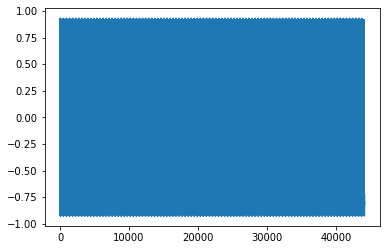

In [535]:
test_wave = Wave()
test_wave.set_frequency(1000)
test_wave.generate_harmonic_square(1, 10)
a = dct(test_wave.get_wave())
plt.plot(test_wave.get_wave())

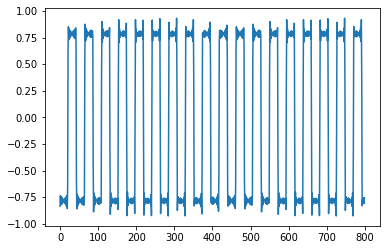

In [536]:
plt.plot(test_wave.get_wave()[200:1000])

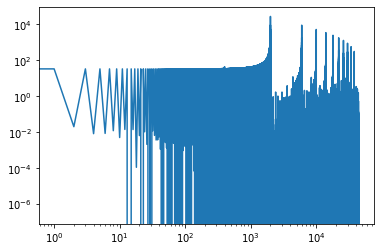

In [537]:
plt.xscale("log")
plt.yscale("log")
#plt.yscale("linear")
plt.plot(a)


In [538]:
print(len(a))
#for i in range(10, int(len(a))):
 #   a[i] = 0.0

44100


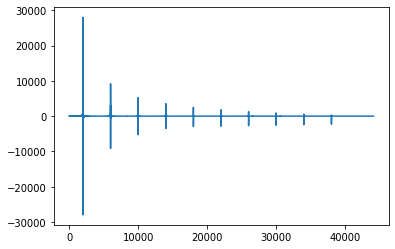

In [539]:
#plt.xscale("log")
#plt.yscale("log")
plt.yscale("linear")
plt.plot(a)

In [540]:
b = dct(a)

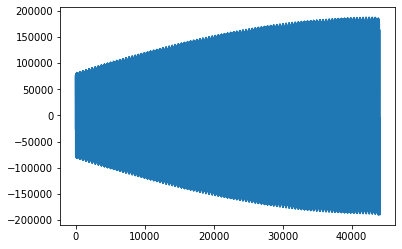

In [541]:
plt.plot(b)

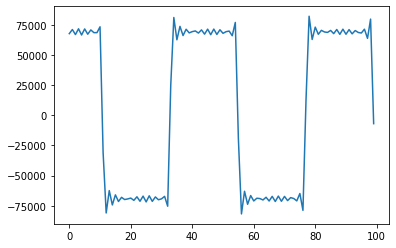

In [542]:
plt.plot(b[100:200])

In [563]:
d = np.copy(a)
print(a.argmax())

for i in range(0,len(d)):
    if abs(d[i]) < 0:
        d[i]=0

1999


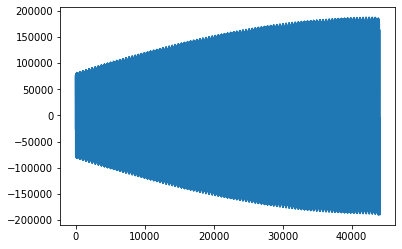

In [564]:
b = dct(d)
plt.plot(b)

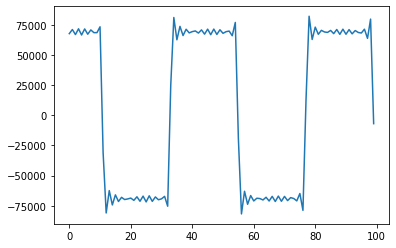

In [565]:
plt.plot(b[100:200])

In [502]:
for i in range (0,20):
    print(i, " : ",a[i])

0  :  2.7832184
1  :  33.488205
2  :  0.020126536
3  :  33.48461
4  :  0.008230577
5  :  33.506943
6  :  0.00850758
7  :  33.47487
8  :  0.0120687485
9  :  33.516285
10  :  0.0050190077
11  :  33.48859
12  :  0.014158947
13  :  33.501892
14  :  -0.019895602
15  :  33.487602
16  :  0.013945238
17  :  33.51417
18  :  0.00010983483
19  :  33.507095


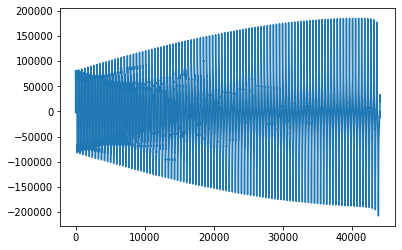

In [416]:
b = dct(a)
plt.plot(b)

In [439]:
def finf_harmonics(wave, count):
    harmonics = list()
    wave_copy = np.copy(wave)
    wave_copy = abs(wave)
    
    for i in range (0, count):
        h =  wave_copy.argmax()
        print(wave_copy[h])
        wave_copy[h] = 0
        harmonics.append(h)
    
    return(harmonics)

print (finf_harmonics(a,10))
ha = finf_harmonics(a,300)

28208.453
27941.816
9492.072
9365.44
9348.416
9225.303
5748.9883
5614.2812
5611.209
5482.297
[199, 201, 197, 599, 601, 203, 195, 1001, 999, 205]
28208.453
27941.816
9492.072
9365.44
9348.416
9225.303
5748.9883
5614.2812
5611.209
5482.297
4144.9487
4011.8528
4002.8853
3878.229
3253.9326
3127.0398
3120.0496
3109.9653
3108.4268
2987.1782
2687.0854
2553.2168
2539.7417
2420.2295
2294.663
2158.5234
2143.4268
2027.8129
2006.998
1879.0635
1872.2646
1870.6006
1868.9885
1862.0876
1853.7527
1787.103
1740.0597
1650.1473
1630.6196
1613.5837
1520.0479
1477.0192
1473.1218
1451.8308
1357.1914
1346.44
1344.054
1340.0491
1331.0798
1327.0967
1259.8572
1205.927
1177.0007
1123.5775
1120.4673
1105.6045
1089.863
1046.6824
1043.8047
1043.4734
1032.048
1029.6895
992.39044
988.9219
940.6476
909.39496
897.6278
859.0713
857.29553
855.4182
842.0347
840.3263
837.87085
824.322
805.5727
802.6378
799.5213
796.6307
792.8397
775.58435
764.1841
738.01044
726.0869
724.39294
720.8812
714.0144
709.3683
709.1432
691.9373
672

In [440]:
print(a[190:210])

   
    
for i in ha:
    print (i * master_frequency / master_frequency /2)

    

[-2.0980667e-02  3.2539326e+03 -6.5983227e-03  4.1449487e+03
  1.6042387e-02  5.7489883e+03  1.5906513e-02  9.4920723e+03
 -5.9605770e-02  2.8208453e+04 -4.5172064e+02 -2.7941816e+04
  7.6074544e-03 -9.2253027e+03 -2.2204459e-02 -5.4822969e+03
  2.0968355e-02 -3.8782290e+03  1.4329108e-03 -2.9871782e+03]
99.5
100.5
98.5
299.5
300.5
101.5
97.5
500.5
499.5
102.5
96.5
700.5
699.5
103.5
95.5
298.5
900.5
301.5
899.5
104.5
94.5
1100.5
1099.5
105.5
93.5
1300.5
1299.5
106.5
92.5
297.5
501.5
1500.5
498.5
302.5
1499.5
91.5
107.5
1700.5
1699.5
90.5
108.5
1900.5
89.5
1899.5
88.5
109.5
296.5
701.5
698.5
303.5
87.5
110.5
86.5
502.5
497.5
85.5
111.5
295.5
901.5
84.5
898.5
304.5
112.5
83.5
82.5
113.5
81.5
80.5
294.5
1101.5
1098.5
305.5
114.5
79.5
702.5
503.5
496.5
697.5
78.5
115.5
77.5
76.5
293.5
1301.5
116.5
75.5
1298.5
306.5
74.5
117.5
73.5
72.5
71.5
292.5
118.5
1501.5
902.5
504.5
495.5
70.5
897.5
307.5
1498.5
69.5
119.5
68.5
703.5
67.5
696.5
66.5
1701.5
291.5
120.5
65.5
64.5
308.5
1698.5
63.5
121.5

In [441]:
29421.326
10735.031
9426.5625
7027.563
5588.284
5465.543
4623.8716
4114.8335
3957.9536
3790.4834
[19, 17, 59, 15, 99, 13, 11, 9, 139, 7]

[19, 17, 59, 15, 99, 13, 11, 9, 139, 7]

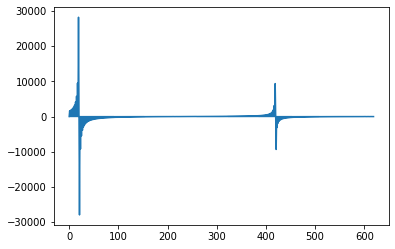

In [442]:
plt.plot(a[180:800])

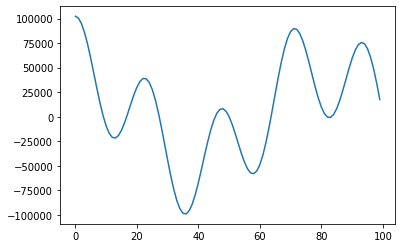

In [450]:
c = np.zeros(100, dtype=np.float32)
#c[7] = 31496.406
c[2] = 25575.031
c[8] = 25575.031
d = dct(c)
plt.plot(d)

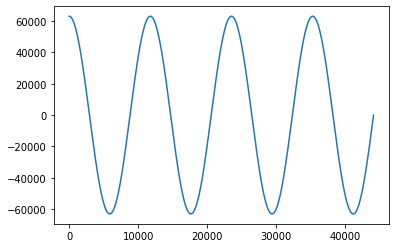

In [444]:
c = np.zeros(44100, dtype=np.float32)
c[7] = 31496.406
#c[15] = 25575.031
d = dct(c)
plt.plot(d)

Spielwiese

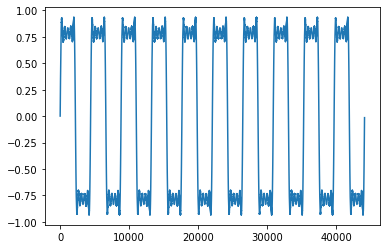

In [104]:
test_wave = Wave()
test_wave.set_frequency(10)
test_wave.generate_harmonic_square(1,5)

plt.plot(test_wave.get_wave())

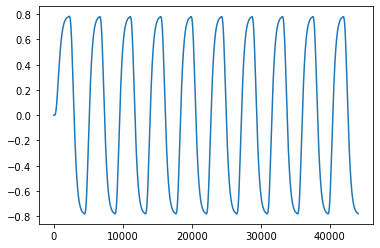

In [107]:

filter = LowPass24DB()
filter.set_frequency(0.005)

out = filter.process(test_wave.get_wave())
plt.plot(out)

The start time is : 3042.5648438
The time difference is : 0.0005919000000176311


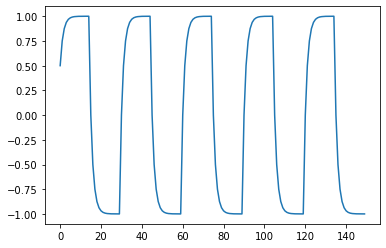

In [69]:
import timeit


wave1  = square(30) 
wave1 = wave1 *5


filter = LowPass6DB()
filter.set_frequency(0.5)


starttime = timeit.default_timer()
print("The start time is :",starttime)

out = filter.process(wave1)

print("The time difference is :", timeit.default_timer() - starttime)


plt.plot(out)


The start time is : 59.2862441
The time difference is : 0.00046200000000595765


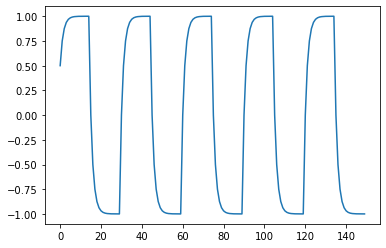

In [12]:
import timeit


wave1   = square(30) 
wave1 = wave1 *5


filter = LowPass6DB2()
filter.set_frequency(0.5)


starttime = timeit.default_timer()
print("The start time is :",starttime)

out = filter.process(wave1)

print("The time difference is :", timeit.default_timer() - starttime)


plt.plot(out)

In [13]:
master_frequency = 44100

1.0
1
0.9999893
101
0.9999535
201
0.99990445
301
0.9998027
401
0.9997031
501
0.99957395
601
0.9994364
701
0.9992122
801
0.9990246
901
0.99880064
1001
0.9985712
1101
0.9982324
1201
0.99793863
1301
0.99764216
1401
0.997204
1501
0.9968694
1601
0.9964732
1701
0.99610555
1801
0.9955495
1901
0.99512887
2001
0.9946623
2101
0.9942009
2201
0.9935297
2301
0.9929949
2401
0.9924749
2501
0.9918827
2601
0.9911567
2701
0.9905418
2801
0.9899463
2901
0.98908216
3001
0.98844343
3101
0.9877556
3201
0.98708904
3301
0.986125
3401
0.9854178
3501
0.98465323
3601
0.9839199
3701
0.9828994
3801
0.9820903
3901
0.9812542
4001
0.9803402
4101
0.97931033
4201
0.97842824
4301
0.9775836
4401
0.976365
4501
0.9754926
4601
0.9745541
4701
0.97365683
4801
0.9723615
4901
0.97143406
5001
0.97043955
5101
0.9694563
5201
0.9681289
5301
0.9671568
5401
0.9661182
5501
0.9646969
5601
0.96408206
5701
0.9629923
5801
0.9616275
5901
0.96012163
6001
0.9590793
6101
0.9579762
6201
0.9569186
6301
0.9553824
6401
0.9543059
6501
0.9531712
660

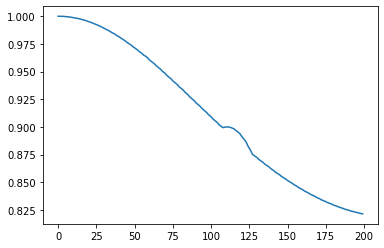

In [19]:
test_wave = Wave()
test_wave.set_frequency(1)
test_wave.generate_sine(1)


filter = LowPass6DB()

k = list()

for index in range(1,20000 , 100):
    test_wave.set_frequency(index)
    test_wave.generate_sine(1)
    filter.set_frequency(0.1)
    filter.reset()
    out = filter.process(test_wave.get_wave())
    print(out.max())
    print(index)
    k.append(out.max())
    pass

plt.plot(k)
print(k)

h
1.0
1
0.99995995
101
0.9998174
201
0.9995977
301
0.99921113
401
0.9988025
501
0.9982728
601
0.99768937
701
0.9968525
801
0.99608135
901
0.9951393
1001
0.9942277
1101
0.9929463
1201
0.9916983
1301
0.9904868
1401
0.9888682
1501
0.98752487
1601
0.98584926
1701
0.98435825
1801
0.9823228
1901
0.9806042
2001
0.9786825
2101
0.97681534
2201
0.9743747
2301
0.97211885
2401
0.9700335
2501
0.96777
2601
0.9650931
2701
0.96253467
2801
0.9601471
2901
0.95704335
3001
0.9545896
3101
0.9517323
3201
0.9490824
3301
0.9456414
3401
0.94286716
3501
0.9398226
3601
0.9369383
3701
0.9331729
3801
0.9301855
3901
0.92682314
4001
0.923517
4101
0.9211878
4201
0.9178689
4301
0.91299796
4401
0.9087651
4501
0.9055239
4601
0.90180194
4701
0.898408
4801
0.8939453
4901
0.890475
5001
0.88659644
5101
0.883151
5201
0.87848777
5301
0.8748946
5401
0.87089705
5501
0.86609435
5601
0.8624982
5701
0.8584222
5801
0.8547216
5901
0.84977925
6001
0.84746003
6101
0.845907
6201
0.8445986
6301
0.8428557
6401
0.84055954
6501
0.83659476


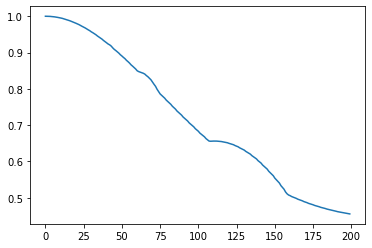

In [27]:
print("h")
filter = LowPass24DB()

k = list()

for index in range(1,20000 , 100):
    test_wave.set_frequency(index)
    test_wave.generate_sine(1)
    filter.set_frequency(0.9)
    filter.reset()
    out = filter.process(test_wave.get_wave())
    print(out.max())
    print(index)
    k.append(out.max())
    pass

plt.plot(k)
print(k)




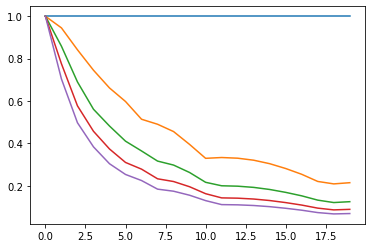

In [150]:
def test_filter(filter):
    test_wave = Wave()
    test_wave.set_frequency(1)
    test_wave.generate_sine(1)

    k = list()
    
    for index in range(1,20000 , 1000):
        
        test_wave.set_frequency(index)
        test_wave.generate_sine(1)
        filter.reset()
        out = filter.process(test_wave.get_wave())
        k.append(out.max())

    return k

filter = LowPass6DB()

l = list()
for i in range (1 , 10, 2):
    filter.set_frequency(1/i) 
    l.append(test_filter(filter))


     
for i in l:    
    plt.plot(i)

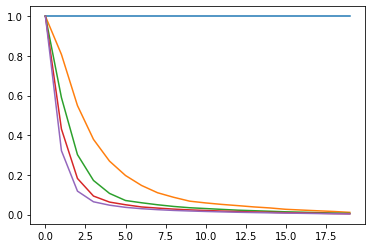

In [151]:
filter = LowPass24DB()

l = list()
for i in range (1 , 10, 2):
    filter.set_frequency(1/i) 
    l.append(test_filter(filter))
     
for i in l:    
    plt.plot(i)

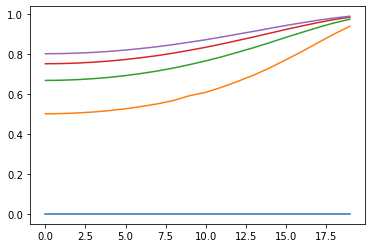

In [165]:
filter = HighPass6DB()

l = list()
for i in range (1 , 10, 2):
    filter.set_frequency(1/i) 
    l.append(test_filter(filter))
     
for i in l:    
    plt.plot(i)


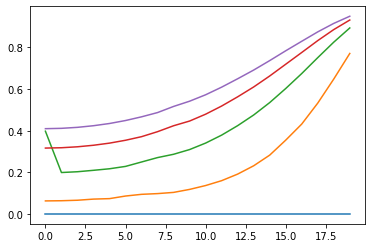

In [176]:
filter = HighPass24DB()

l = list()
for i in range (1 , 10, 2):
    filter.set_frequency(1/i) 
    l.append(test_filter(filter))
     
for i in l:    
    plt.plot(i)

1.0
1
0.9998158
101
0.999216
201
0.99822575
301
0.9968165
401
0.99504685
501
0.9928818
601
0.9903625
701
0.9874261
801
0.9841454
901
0.98045427
1001
0.97672516
1101
0.9723118
1201
0.9675296
1301
0.9627602
1401
0.95741487
1501
0.95229566
1601
0.9464237
1701
0.9422754
1801
0.934493
1901
0.92830145
2001
0.9242366
2101
0.9183975
2201
0.9084067
2301
0.90157986
2401
0.8975014
2501
0.8946902
2601
0.8883153
2701
0.87928444
2801
0.8666843
2901
0.8576329
3001
0.85561645
3101
0.8550259
3201
0.8518486
3301
0.84739864
3401
0.8400914
3501
0.8311284
3601
0.8198865
3701
0.8074211
3801
0.7923413
3901
0.78908014
4001
0.7900201
4101
0.7906629
4201
0.789465
4301
0.7866
4401
0.7837355
4501
0.7798753
4601
0.7742493
4701
0.76717484
4801
0.759958
4901
0.7508061
5001
0.7408607
5101
0.7316234
5201
0.72033167
5301
0.7073999
5401
0.69359416
5501
0.67938983
5601
0.68053174
5701
0.6816468
5801
0.68258584
5901
0.68379354
6001
0.6839536
6101
0.6831736
6201
0.6825739
6301
0.68183035
6401
0.6804625
6501
0.6778166
6601


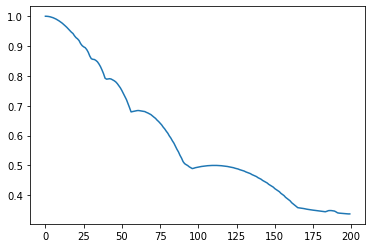

In [29]:
test_wave = Wave()
test_wave.set_frequency(1)
test_wave.generate_sine(1)


filter = LowPass6DB()

k = list()

for index in range(1,20000 , 100):
    test_wave.set_frequency(index)
    test_wave.generate_sine(1)
    filter.set_frequency(0.5)
    filter.reset()
    out = filter.process(test_wave.get_wave())
    print(out.max())
    print(index)
    k.append(out.max())
    pass

plt.plot(k)
print(k)

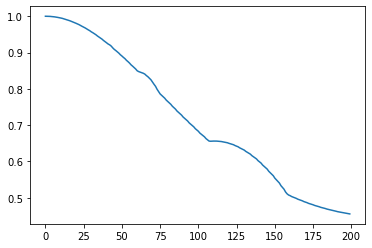

In [115]:
master_frequency = 44100

test_wave = Wave()
test_wave.set_frequency(1)
test_wave.generate_sine(1)


filter = LowPass24DB()

k = list()

for index in range(1,20000 , 100):
    test_wave.set_frequency(index)
    test_wave.generate_sine(1)
    filter.set_frequency(0.9)
    filter.reset()
    out = filter.process(test_wave.get_wave())
    k.append(out.max())
    pass

plt.plot(k)
k2 = k

In [119]:
master_frequency = 44100

test_wave = Wave()
test_wave.set_frequency(1)
test_wave.generate_sine(1)


filter = LowPass24DB()

k = list()

for index in range(1,20000 , 100):
    test_wave.set_frequency(index)
    test_wave.generate_sine(1)
    filter.set_frequency(0.99)
    filter.reset()
    out = filter.process(test_wave.get_wave())
    k.append(out.max())
    pass


In [123]:
master_frequency = 44100

test_wave = Wave()
test_wave.set_frequency(1)
test_wave.generate_sine(1)


filter = LowPass24DB()

k3 = list()

for index in range(1,20000 , 100):
    test_wave.set_frequency(index)
    test_wave.generate_sine(1)
    filter.set_frequency(0.1)
    filter.reset()
    out = filter.process(test_wave.get_wave())
    k3.append(out.max())
    pass


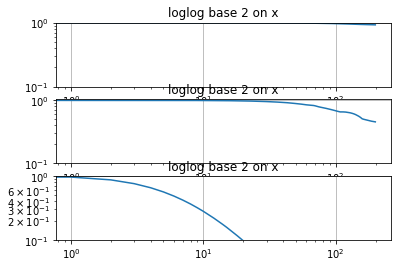

In [133]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1)

t = np.arange(0.01, 20.0, 0.01)


plt.ylim([0.1, 1])

#ax1.loglog(k, 20 * np.exp(-t / 10.0))
ax1.loglog(k)
ax1.set_ylim(bottom = 0.1)
ax1.set_xscale('log', base=10)
ax1.set_yscale('log', base=10)
ax1.set(title='loglog base 2 on x')
ax1.grid()



#ax2.loglog(k2, 20 * np.exp(-t / 10.0))
ax2.loglog(k2)
ax2.set_ylim(bottom = 0.1)
ax2.set_xscale('log', base=10)
ax2.set_yscale('log', base=10)
ax2.set(title='loglog base 2 on x')
ax2.grid()

ax3.loglog(k3)

ax3.set_ylim(bottom = 0.1)
ax3.set_xscale('log', base=10)
ax2.set_yscale('log', base=10)
ax3.set(title='loglog base 2 on x')
ax3.grid()



plt.show()


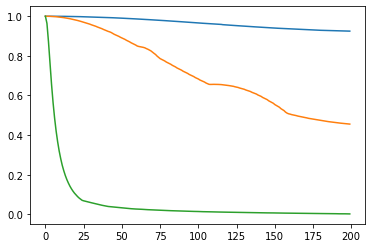

In [124]:


plt.plot(k)
plt.plot(k2)
plt.plot(k3)
plt.show()

In [96]:
#plt.plot([k,k2])
print(k)
print("  ")
print(k2)

[1.0, 0.99918133, 0.9967676, 0.99275285, 0.98724985, 0.9800276, 0.9713951, 0.96152097, 0.95008236, 0.93739754, 0.92406493, 0.90964144, 0.894929, 0.87831247, 0.8617019, 0.8476109, 0.8273486, 0.8141639, 0.79664314, 0.77917856, 0.7657529, 0.746822, 0.72718483, 0.7165165, 0.70156527, 0.68368846, 0.66321915, 0.65418035, 0.64239645, 0.6283488, 0.6119101, 0.5934204, 0.58021, 0.57084394, 0.5620402, 0.5503889, 0.5376146, 0.5234999, 0.50928503, 0.49269795, 0.48330668, 0.47653827, 0.46899518, 0.46089312, 0.45175648, 0.44256592, 0.43255, 0.4218801, 0.41007575, 0.3990352, 0.38635993, 0.3757431, 0.37140083, 0.36704963, 0.3615563, 0.35576332, 0.34991965, 0.3440957, 0.33736783, 0.330459, 0.32385117, 0.316501, 0.30948168, 0.30179518, 0.2943367, 0.28636673, 0.2780074, 0.27059922, 0.26260248, 0.2575121, 0.2543393, 0.25153854, 0.24881415, 0.24521938, 0.24189451, 0.2385395, 0.2350193, 0.23135743, 0.2276757, 0.22386688, 0.22004026, 0.21563913, 0.2120724, 0.2079137, 0.20387997, 0.19923387, 0.19487554, 0.1910

0.4953752
0.76782507


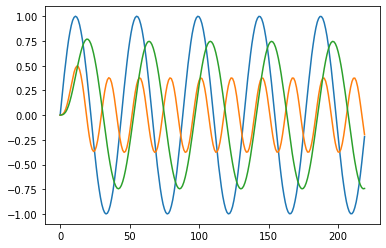

In [95]:
filter = LowPass24DB()

test_wave.set_frequency(2000)
test_wave.generate_sine(.005)
filter.set_frequency(0.3)
filter.reset()
out = filter.process(test_wave.get_wave())
print(out.max())

test_wave.set_frequency(1000)
test_wave.generate_sine(.005)
filter.reset()
out2 = filter.process(test_wave.get_wave())
print(out2.max())

plt.plot(test_wave.get_wave())
plt.plot(out)
plt.plot(out2)

In [ ]:
def filterLow6DB_2(wave, frequency):

    order1 = 0
    wave_out = list()
    
    for i in range (0, len(wave)):
        order1 = order1 + ((wave[i] - order1) * frequency)
        wave_out.append(order1)
    
    return(wave_out)


def filterLow12DB(wave, frequency):

    order1 = 0
    order2 = 0
    wave_out = list()
    
    for i in range (0, len(wave)):
        order1 = order1 + ((wave[i] - order1) * frequency)
        order2 = order2 + ((order1 - order2) * frequency)
        wave_out.append(order2)
    
    return(wave_out)


def filterLow24DB(wave, frequency):

    order1 = 0
    order2 = 0
    order3 = 0
    order4 = 0
    wave_out = list()
    
    for i in range (0, len(wave)):
        order1 = order1 + ((wave[i] - order1) * frequency)
        order2 = order2 + ((order1 - order2) * frequency)
        order3 = order3 + ((order2 - order3) * frequency)
        order4 = order4 + ((order3 - order4) * frequency)
        wave_out.append(order4)
    
    return(wave_out)


In [ ]:
wave2 = filterLow6DB(wave,0.6)        
plt.plot(wave2)

In [ ]:
wave2 = filterLow6DB_2(wave,0.4)        
plt.plot(wave2)

In [ ]:
wave2 = filterLow12DB(wave,0.4)        
plt.plot(wave2)

In [ ]:
wave2 = filterLow24DB(wave,0.4)        
plt.plot(wave2)

In [ ]:
wave2 = filterHigh6DB(wave,0.9)        
plt.plot(wave2)